In [17]:
"""
@author: Tan Nguyen & Matt Bezdek
"""

import pickle as pkl
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
py.offline.init_notebook_mode(connected = True)
colors = ["lightseagreen", "mediumpurple", "goldenrod", 'yellowgreen', 
          'cornflowerblue', 'darkred', 'bisque', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange',
          'black', 'blanchedalmond',
         'aliceblue', 'antiquewhite', 'aqua', 'aquamarine',
          'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue',
          'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
          'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan',
          'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen',
          'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
          'darkslateblue', 'darkslategray', 'darkslategrey']
import plotly.io as pio
pio.templates.default = "simple_white"
pio.renderers.default = 'png'

layout = dict(showlegend=True, margin=dict(autoexpand=True), title_font=dict(size=22), title_x=0.5)
x_axis = dict(title=dict(font=dict(size=30)), tickfont=dict(size=18))
y_axis = dict(title=dict(font=dict(size=30)), tickfont=dict(size=18))

In [18]:
bi_df_long = pd.read_csv('../biserial_all_variants.csv')
bi_df_long

,Unnamed: 0,epoch,tag,variable,value,training_time,sem_variant
0,5786,51.0,april_17_always_s1090_1E-01_5E+05,bi,0.406914,515.858997,full
1,5797,101.0,april_17_always_s1090_1E-01_5E+05,bi,0.389581,1033.625544,full
2,5808,21.0,april_17_always_s1090_1E-01_5E+05,bi,0.398048,217.908973,full
3,5819,41.0,april_17_always_s1090_1E-01_5E+05,bi,0.395017,419.914001,full
4,5830,91.0,april_17_always_s1090_1E-01_5E+05,bi,0.383612,923.098633,full
...,...,...,...,...,...,...,...
14195,23887,61.0,april_24_nosema_s1050_1E-01_5E+05,bi_shuffle,0.221966,625.389431,full_nosema
14196,23888,61.0,april_24_nosema_s1050_1E-01_5E+05,bi_shuffle,0.251674,625.389431,full_nosema
14197,23889,61.0,april_24_nosema_s1050_1E-01_5E+05,bi_shuffle,0.241928,625.389431,full_nosema
14198,23890,61.0,april_24_nosema_s1050_1E-01_5E+05,bi_shuffle,0.260898,625.389431,full_nosema


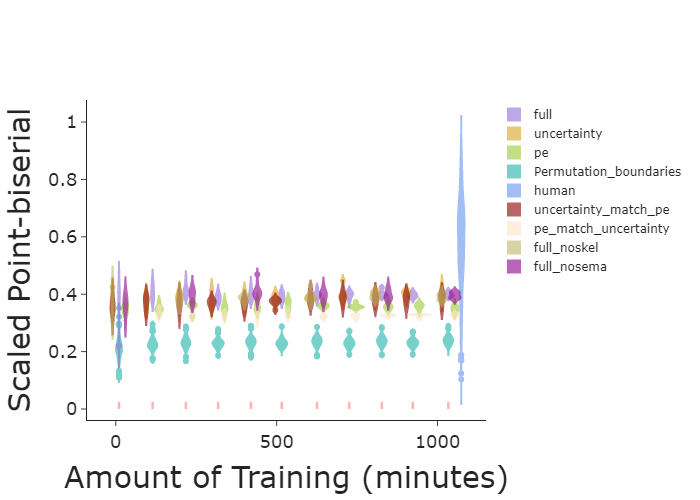

In [19]:
# compare three models with human
fig = go.Figure()
# tag_names = ['full', 'uncertainty', 'pe', 'uncertainty_match_pe', 'pe_match_uncertainty']
tag_names = ['full', 'uncertainty', 'pe', 'human', 'uncertainty_match_pe', 'pe_match_uncertainty', 'full_noskel', 'full_nosema']
# shifts = [0, -20, 20, -20, 20]
shifts = [0, -20, 20, 40, -20, 20, -20, 20]
widths = [35, 35, 50, 20, 35, 70, 35, 35]
point = 0
ranks = [0, 1, 2, 3, 4, 5, 6, 7]

df = bi_df_long[(bi_df_long.variable == 'bi_shuffle')
#                        & (bi_df_long.tag.isin(full_tags))
                      ]
fig.add_trace(
    go.Violin(x=df.training_time, y=df.value, name=f"Permutation_boundaries", fillcolor=colors[0], 
              line_color=colors[0], opacity=0.6, points=point, width=widths[0],
              legendrank=ranks[3])
)
# for i, tags in enumerate([full_tags_apr, uncertainty_tags, pe_tags_mar, uncertainty_match_pe_tags, pe_match_uncertainty_tags]):
for i, tags in enumerate(tag_names):
    df = bi_df_long[(bi_df_long.variable == 'bi') & (bi_df_long.sem_variant == tags)]
    if 'human' in (tags):
        df = bi_df_long[(bi_df_long.epoch > 100) & (bi_df_long.sem_variant == tags)]
#         df = df
    fig.add_trace(
        go.Violin(x=df.training_time+shifts[i], y=df.value, name=f"{tag_names[i]}", 
                  fillcolor=colors[i+1], line_color=colors[i+1], opacity=0.6, 
                  points=point, width=widths[i],
                  scalemode='count',
                  legendrank=ranks[i],
                  # mode='markers', marker=dict(size=5, color=colors[i+1])
                # boxpoints='all'
    ))


# fig.update_layout(layout, showlegend=True, width=1000, height=700)
fig.update_layout(layout)
fig.update_xaxes(x_axis)
fig.update_yaxes(y_axis)
fig.update_xaxes(title=dict(text="Amount of Training (minutes)"))
fig.update_yaxes(title=dict(text="Scaled Point-biserial"))
# fig.update_layout(width=500)
# fig.update_layout(title="Flurries are removed")
fig.update_layout(shapes=[{'type': 'line','y0':0,'y1': 0.05 * 0.5,
                           'x0': t, 
                           'x1': t,
                           'xref':'x1','yref':'y1',
                           'line': {'color': 'red','width': 2.5}} 
                          for t in bi_df_long.training_time.unique()])
fig.show()

In [20]:
mi_df_long = pd.read_csv('../mi_all_variants.csv')

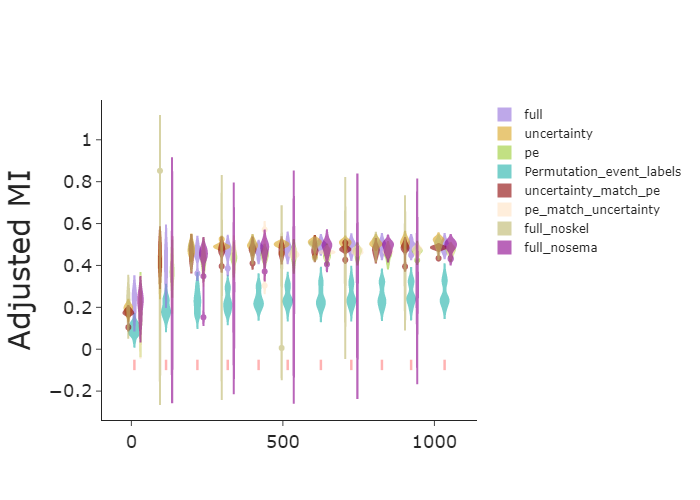

In [21]:
fig = go.Figure()
# note that there is no humans for MI, just adding so that color scheme is consistent with biserial
tag_names = ['full', 'uncertainty', 'pe', 'human', 'uncertainty_match_pe', 'pe_match_uncertainty', 'full_noskel', 'full_nosema']
shifts = [0, -20, 20, 0, -20, 20, -20, 20]
widths = [35, 50, 30, 10, 50, 50, 35, 35]
point = 0
ranks = [0, 1, 2, 3, 4, 5, 6, 7]

df = mi_df_long[(mi_df_long.variable == 'mi_shuffle')
#                   & (mi_df_long.tag.isin(uncertainty_tags, full)
                 ]
fig.add_trace(
    go.Violin(x=df.training_time, y=df.value, name=f"Permutation_event_labels", 
              fillcolor=colors[0], line_color=colors[0], opacity=0.6, points=point, width=35,
              legendrank=ranks[4])
)

for i, tags in enumerate(tag_names):
    df = mi_df_long[(mi_df_long.variable == 'mi') & (mi_df_long.sem_variant == tags)]
    fig.add_trace(
        go.Violin(x=df.training_time+shifts[i], y=df.value, name=f"{tag_names[i]}", 
                  fillcolor=colors[i+1], line_color=colors[i+1], opacity=0.6, 
                  points=point, width=widths[i], scalemode='count',
                  legendrank=ranks[i],
                  # mode='markers', marker=dict(size=5, color=colors[i+1])
                  )
    )
    

fig.update_layout(layout)
fig.update_xaxes(x_axis)
fig.update_yaxes(y_axis)
# fig.update_xaxes(title=dict(text="Amount of Training (minutes)"))
fig.update_yaxes(title=dict(text="Adjusted MI"))
# fig.update_layout(title="Adjusted Mutual Information", title_x=0.5)
fig.update_layout(shapes=[{'type': 'line','y0':-0.1,'y1': -0.05,'x0': t, 
                           'x1': t,
                           'xref':'x1','yref':'y1',
                           'line': {'color': 'red','width': 2.5}} 
                          for t in mi_df_long.training_time.unique()])
fig.show()